<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [17]:
import pandas as pd

Load the dataset into a dataframe.


In [18]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot
sns.histplot(x=df["ConvertedComp"], kde=True)
plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

Plot the histogram for the column `ConvertedComp`.


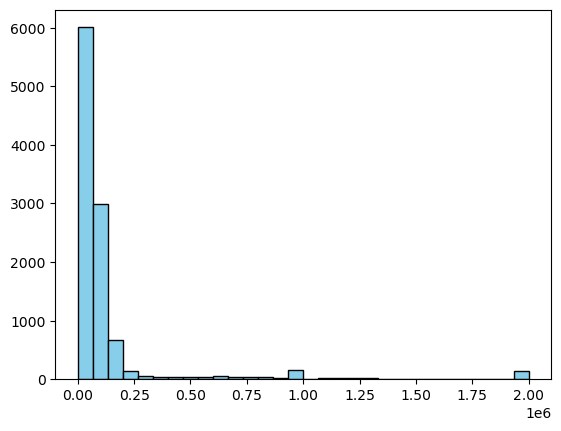

In [32]:
# your code goes here

plt.hist(df["ConvertedComp"], bins=30, color='skyblue', edgecolor='black')

plt.show()


What is the median of the column `ConvertedComp`?


In [33]:
# your code goes here
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [39]:
# your code goes here

#df["Gender"].value_counts()

df[df["Gender"] == "Man"].shape

(10480, 85)

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [76]:
# your code goes here

df["Age"].median()

x = df[df["Gender"] == "Woman"]
x["ConvertedComp"].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [72]:
# your code goes here

df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


In [49]:
# your code goes here
#plt.hist(df["Age"], bins=50, color='skyblue', edgecolor='black')

sns.histplot(x=df["Age"], kde=True)
plt.show()


AttributeError: module 'seaborn' has no attribute 'histplot'

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


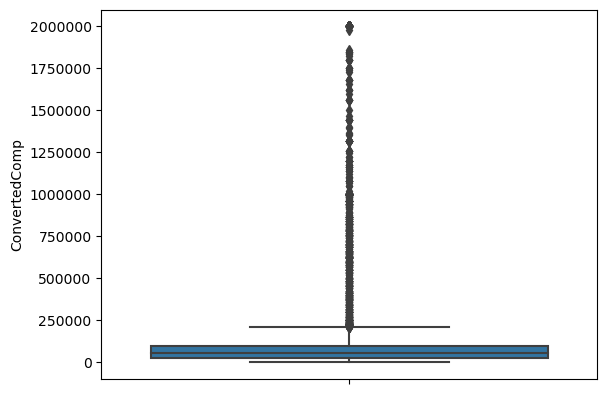

In [81]:
# your code goes here

sns.boxplot(y="ConvertedComp", data=df)
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [61]:
# your code goes here

Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)

Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [60]:
# your code goes here
# Calculate the lower bound and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [68]:
# your code goes here
outliers = (df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)
num_outliers = outliers.sum()

print("Number of outliers:", num_outliers)



Number of outliers: 879


In [77]:
df["ConvertedComp"].median()

57745.0

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [82]:
# your code goes here

# Subtract outliers from the DataFrame
df_no_outliers = df[~outliers]

df_no_outliers["ConvertedComp"].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [55]:
# your code goes here

df[["Age","Respondent","CompTotal","ConvertedComp","WorkWeekHrs","CodeRevHrs"]].corr()

,Age,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs
Age,1.000000,0.004041,0.006970,0.105386,0.036518,-0.020469
Respondent,0.004041,1.000000,-0.013490,0.002181,-0.015314,0.004621
CompTotal,0.006970,-0.013490,1.000000,0.001037,0.003510,0.007063
ConvertedComp,0.105386,0.002181,0.001037,1.000000,0.021143,-0.033865
WorkWeekHrs,0.036518,-0.015314,0.003510,0.021143,1.000000,0.026517
CodeRevHrs,-0.020469,0.004621,0.007063,-0.033865,0.026517,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
